# Evaluation of the Nescience class

In [1]:
import numpy as np

from fastautoml.fastautoml import Nescience, Miscoding, Inaccuracy, Surfeit

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

/home/rleiva/anaconda3/envs/sklearn/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
rcParams['figure.figsize'] = 10, 10

#### Nescience of a decision tree classifier

In [3]:
data = load_digits()
X = data.data
y = data.target

In [4]:
tree = DecisionTreeClassifier()
tree.fit(X, y)
tree.score(X, y)

1.0

In [5]:
nescience = Nescience()
nescience.fit(X, y)

Nescience()

In [6]:
nescience.nescience(tree)

0.5553661231443324

#### Comparison

In [7]:
data = load_breast_cancer()
X = data.data
y = data.target

In [8]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)
tree.score(X, y)

0.9789103690685413

In [9]:
nescience = Nescience()
nescience.fit(X, y)
nescience.nescience(tree)

0.6068801706957987

In [10]:
nn = MLPClassifier()
nn.fit(X, y)
nn.score(X, y)

0.9472759226713533

In [11]:
nescience.nescience(nn)

/home/rleiva/anaconda3/envs/sklearn/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:195: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


0.761718907936427

#### Evolution of Nescience

In [12]:
data = load_breast_cancer()
# data = load_digits()
X = data.data
y = data.target

In [13]:
lmiscoding  = list()
linaccuracy = list()
lredudancy  = list()
lnescience  = list()
lcrossval   = list()

miscoding = Miscoding()
miscoding.fit(X, y)

inaccuracy = Inaccuracy()
inaccuracy.fit(X, y)

surfeit = Surfeit()
surfeit.fit(X, y)

nescience = Nescience()
# nescience.fit(X, y, method="Harmonic")
nescience.fit(X, y)

for i in range(1, 20):
    
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X, y)
    
    lmiscoding.append(miscoding.miscoding_model(tree))
    linaccuracy.append(inaccuracy.inaccuracy_model(tree))
    lredudancy.append(surfeit.surfeit_model(tree))
    lnescience.append(nescience.nescience(tree))

    scores = cross_val_score(tree, X, y, cv=30)
    lcrossval.append(1 - scores.mean())

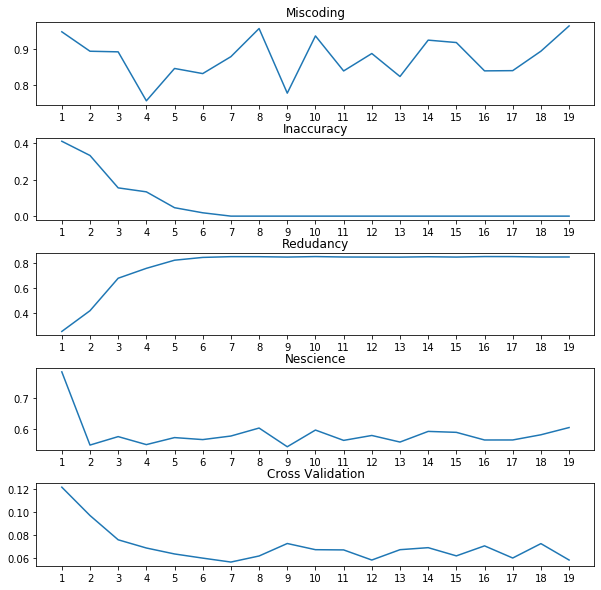

In [14]:
fig, axs = plt.subplots(5, gridspec_kw={'hspace': 0.4, 'wspace': 0})

axs[0].plot(range(1, 20), lmiscoding)
axs[0].set_title('Miscoding')
axs[0].set_xticks(range(1, 20))
axs[0].set_xticklabels(range(1, 20))

axs[1].plot(range(1, 20), linaccuracy)
axs[1].set_title('Inaccuracy')
axs[1].set_xticks(range(1, 20))
axs[1].set_xticklabels(range(1, 20))

axs[2].plot(range(1, 20), lredudancy)
axs[2].set_title('Redudancy')
axs[2].set_xticks(range(1, 20))
axs[2].set_xticklabels(range(1, 20))

axs[3].plot(range(1, 20), lnescience)
axs[3].set_title('Nescience')
axs[3].set_xticks(range(1, 20))
axs[3].set_xticklabels(range(1, 20))

axs[4].plot(range(1, 20), lcrossval)
axs[4].set_title('Cross Validation')
axs[4].set_xticks(range(1, 20))
axs[4].set_xticklabels(range(1, 20))

plt.show()

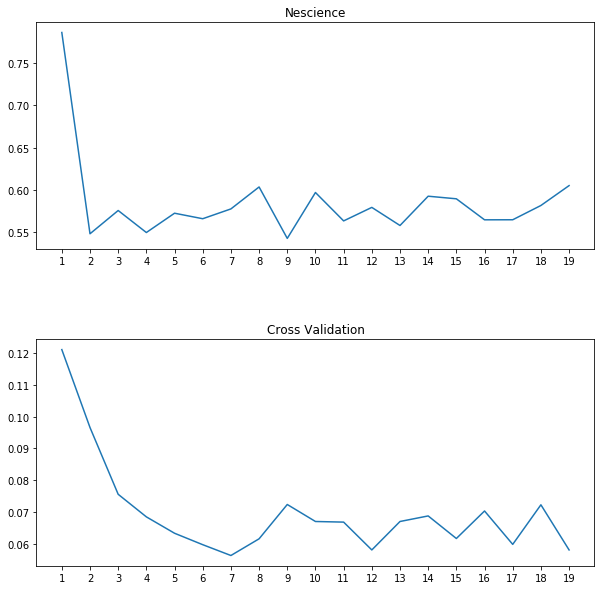

In [15]:
fig, axs = plt.subplots(2, gridspec_kw={'hspace': 0.4, 'wspace': 0})

axs[0].plot(range(1, 20), lnescience)
axs[0].set_title('Nescience')
axs[0].set_xticks(range(1, 20))
axs[0].set_xticklabels(range(1, 20))

axs[1].plot(range(1, 20), lcrossval)
axs[1].set_title('Cross Validation')
axs[1].set_xticks(range(1, 20))
axs[1].set_xticklabels(range(1, 20))

plt.show()

In [16]:
np.where(lnescience == np.min(lnescience))

(array([8]),)

In [17]:
np.where(lcrossval == np.min(lcrossval))

(array([6]),)

### Hyperparameters Selection

In [18]:
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

Implement an scoring object based on the Nescience class

In [19]:
from fastautoml.fastautoml import Nescience

def my_custom_loss_func(estimator, X, y):
    
    nsc = Nescience()
    nsc.fit(X, y)
    nescience = nsc.nescience(estimator)
    
    # scikit-learn expect that higher numbers are better
    score = -nescience
    
    return score

Load dataset

In [20]:
data = load_digits()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

Multilayer Perceptron

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
parameters = {'solver': ['lbfgs'],
              'max_iter': [1000, 1500, 2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10, 3),
              'hidden_layer_sizes':[(60,), (100,), (60, 60,), (100, 100,), (60, 60, 60,), (100, 100, 100,)]}

'score' based search

In [24]:
clf_std = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters, cv=3, iid=True, n_jobs=-1)

In [25]:
clf_std.fit(X_train, y_train)

/home/rleiva/anaconda3/envs/sklearn/lib/python3.8/site-packages/sklearn/model_selection/_search.py:821: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.

In [26]:
clf_std.best_params_

{'alpha': 0.1,
 'hidden_layer_sizes': (100,),
 'max_iter': 2000,
 'solver': 'lbfgs'}

In [27]:
y_true, y_pred = y_test, clf_std.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.90      1.00      0.95        52
           2       1.00      0.98      0.99        53
           3       1.00      0.94      0.97        54
           4       1.00      1.00      1.00        48
           5       0.96      0.96      0.96        57
           6       0.98      0.98      0.98        60
           7       1.00      0.96      0.98        53
           8       0.98      0.92      0.95        61
           9       0.92      0.98      0.95        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



'nescience' based search

In [28]:
import time

In [29]:
clf_nsc = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters, cv=3, scoring=my_custom_loss_func, iid=True)

In [30]:
start = time.time()
clf_nsc.fit(X_train, y_train)
stop = time.time()

/home/rleiva/anaconda3/envs/sklearn/lib/python3.8/site-packages/sklearn/model_selection/_search.py:821: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [31]:
stop - start

384.6172411441803

In [32]:
clf_nsc.best_params_

{'alpha': 0.1,
 'hidden_layer_sizes': (60,),
 'max_iter': 1500,
 'solver': 'lbfgs'}

In [33]:
y_true, y_pred = y_test, clf_nsc.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.88      1.00      0.94        52
           2       1.00      0.96      0.98        53
           3       0.98      0.96      0.97        54
           4       1.00      0.98      0.99        48
           5       0.98      0.96      0.97        57
           6       1.00      0.98      0.99        60
           7       0.98      0.96      0.97        53
           8       0.96      0.89      0.92        61
           9       0.90      0.96      0.93        57

    accuracy                           0.96       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.96      0.96       540

